Đang xử lý: ./udp_data\data_20250429_143813.csv


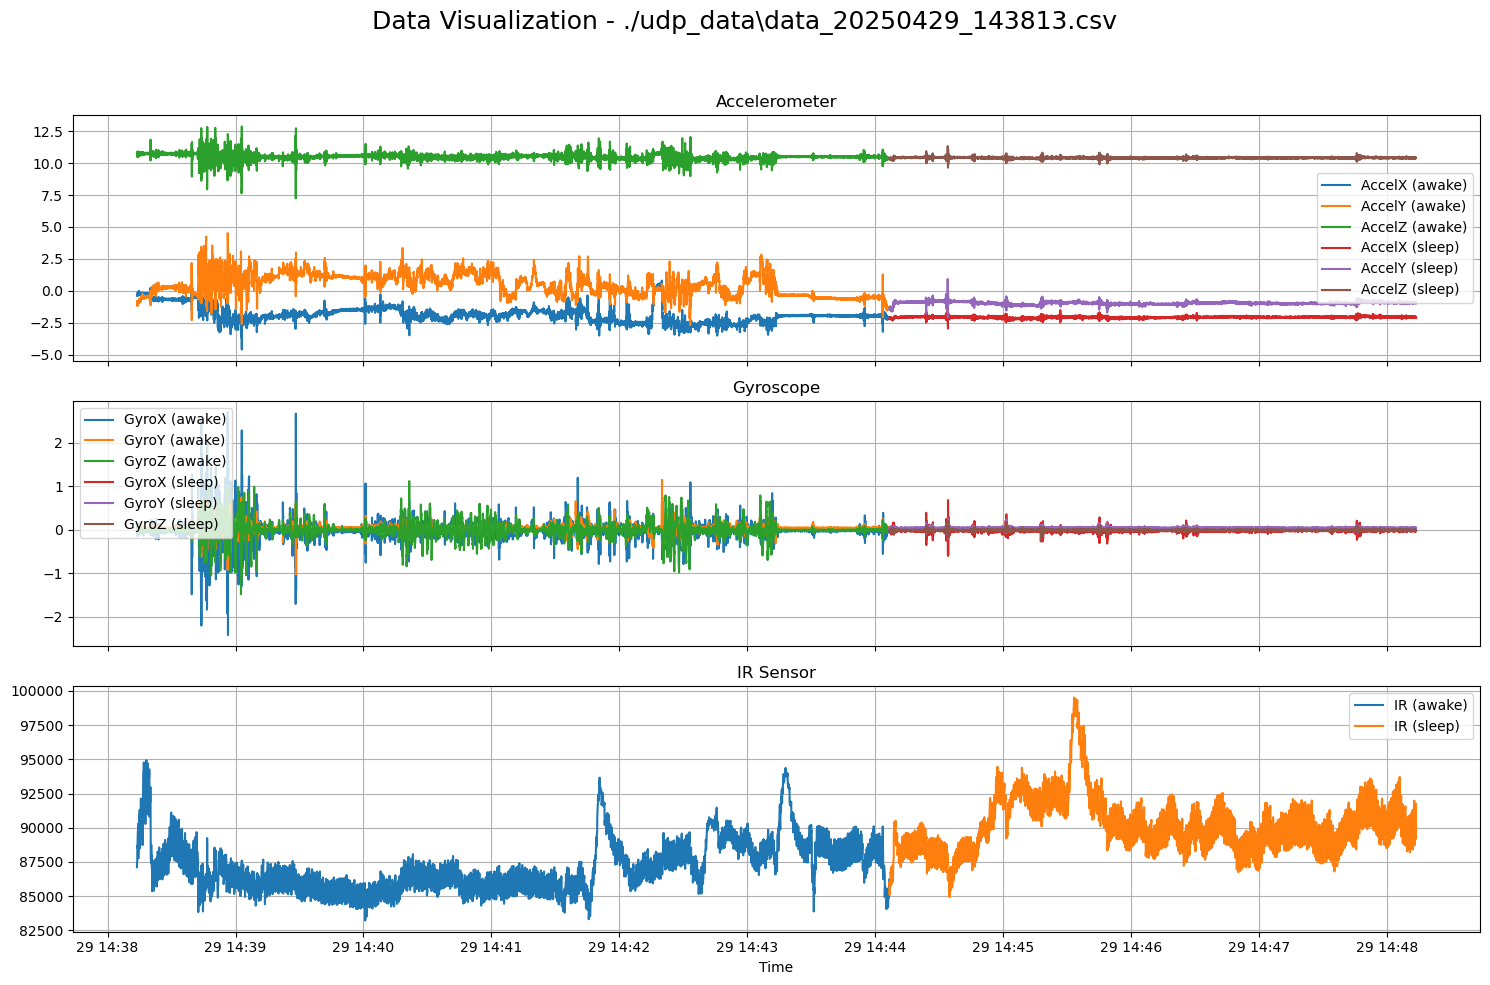

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Đọc tất cả các file tên data*.csv
files = glob.glob("./udp_data/data*.csv")

for file in files:
    print(f"Đang xử lý: {file}")
    df = pd.read_csv(file)

    # Đảm bảo ServerTime là kiểu datetime
    df['ServerTime'] = pd.to_datetime(df['ServerTime'])

    # Tạo figure
    fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
    fig.suptitle(f'Data Visualization - {file}', fontsize=18)

    # Lặp qua từng nhãn (awake, sleep)
    for label, group in df.groupby('Label'):
        axs[0].plot(group['ServerTime'], group['AccelX'], label=f'AccelX ({label})')
        axs[0].plot(group['ServerTime'], group['AccelY'], label=f'AccelY ({label})')
        axs[0].plot(group['ServerTime'], group['AccelZ'], label=f'AccelZ ({label})')

        axs[1].plot(group['ServerTime'], group['GyroX'], label=f'GyroX ({label})')
        axs[1].plot(group['ServerTime'], group['GyroY'], label=f'GyroY ({label})')
        axs[1].plot(group['ServerTime'], group['GyroZ'], label=f'GyroZ ({label})')

        axs[2].plot(group['ServerTime'], group['IR'], label=f'IR ({label})')

    # Tiêu đề và chú thích
    axs[0].set_title('Accelerometer')
    axs[1].set_title('Gyroscope')
    axs[2].set_title('IR Sensor')
    axs[2].set_xlabel('Time')

    for ax in axs:
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
